**Rolling Average Simple Model**

In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
raw_csv_data = pd.read_csv("../data/processed/appl_stock_values.csv", index_col = 0, header=0)
df = raw_csv_data.copy()
df["MA20"] = df["Close"].rolling(20).mean()
df["MA50"] = df["Close"].rolling(50).mean()
df = df.reset_index()
df = df.set_index("Date")
df


,index,Open,High,Low,Close,Volume,MA20,MA50
Date,,,,,,,,
1984-09-07,0,0.423880,0.429020,0.418740,0.423880,23220030,NaN,NaN
1984-09-10,1,0.423880,0.425160,0.413660,0.421340,18022532,NaN,NaN
1984-09-11,2,0.425160,0.436680,0.425160,0.429020,42498199,NaN,NaN
1984-09-12,3,0.429020,0.431570,0.416180,0.416180,37125801,NaN,NaN
1984-09-13,4,0.439270,0.440520,0.439270,0.439270,57822062,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-16,1001,179.279999,181.139999,170.750000,172.259995,150185800,167.136501,155.778000
2021-12-17,1002,169.929993,173.470001,169.690002,171.139999,195432700,167.800001,156.335001
2021-12-20,1003,168.279999,170.580002,167.460007,169.750000,107499100,168.260001,156.872001


In [7]:
df = df.dropna()
df = df[["Close", "MA20", "MA50"]]
df

,Close,MA20,MA50
Date,,,
1984-11-15,0.379060,0.396991,0.404880
1984-11-16,0.371380,0.395133,0.403830
1984-11-19,0.349620,0.392317,0.402396
1984-11-20,0.361120,0.389628,0.401038
1984-11-21,0.368830,0.387132,0.400091
...,...,...,...
2021-12-16,172.259995,167.136501,155.778000
2021-12-17,171.139999,167.800001,156.335001
2021-12-20,169.750000,168.260001,156.872001


In [8]:
# IF MA20 > MA50 but isn't the day before, buy it
# If MA20 < MA50 but isn't the day before, sell it

Buy = []
Sell = []

for i in range(len(df)):
    if (df.MA20.iloc[i] > df.MA50.iloc[i]) and (df.MA20.iloc[i-1] < df.MA50.iloc[i-1]):
        Buy.append(i)
 
    elif (df.MA20.iloc[i] < df.MA50.iloc[i]) and (df.MA20.iloc[i-1] > df.MA50.iloc[i-1]):
        Sell.append(i)


print("Buy: ", Buy, "\n")
print("Sell: ", Sell)

Buy:  [19, 171, 176, 217, 450, 501, 786, 833, 899, 981, 1036, 1117, 1205, 1345, 1398, 1422, 1515, 1691, 1759, 1801, 1900, 1976, 2009, 2149, 2262, 2323, 2450, 2566, 2644, 2782, 2906, 2969, 3009, 3125, 3213, 3332, 3446, 3508, 3531, 3571, 3645, 3775, 3951, 3992, 4089, 4207, 4278, 4530, 4607, 4660, 4832, 4928, 4990, 5186, 5206, 5407, 5475, 5583, 5629, 5756, 5814, 5890, 5995, 6111, 6135, 6335, 6380, 6450, 6514, 6677, 6720, 6836, 6959, 7183, 7234, 7288, 7387, 7396, 7419, 7548, 7616, 7672, 7799, 7891, 7964, 7969, 7985, 8090, 8243, 8307, 8364, 8391, 8435, 8486, 8625, 8721, 8931, 9063, 9174, 9223, 9314] 

Sell:  [0, 69, 173, 181, 416, 475, 741, 821, 857, 939, 993, 1069, 1171, 1264, 1389, 1405, 1449, 1631, 1736, 1787, 1859, 1912, 1998, 2083, 2170, 2301, 2372, 2541, 2602, 2712, 2807, 2927, 3001, 3054, 3159, 3257, 3428, 3499, 3509, 3538, 3602, 3770, 3902, 3976, 4012, 4179, 4218, 4409, 4562, 4636, 4795, 4916, 4979, 5147, 5201, 5356, 5432, 5582, 5605, 5740, 5813, 5844, 5953, 6006, 6131, 6326, 6361, 

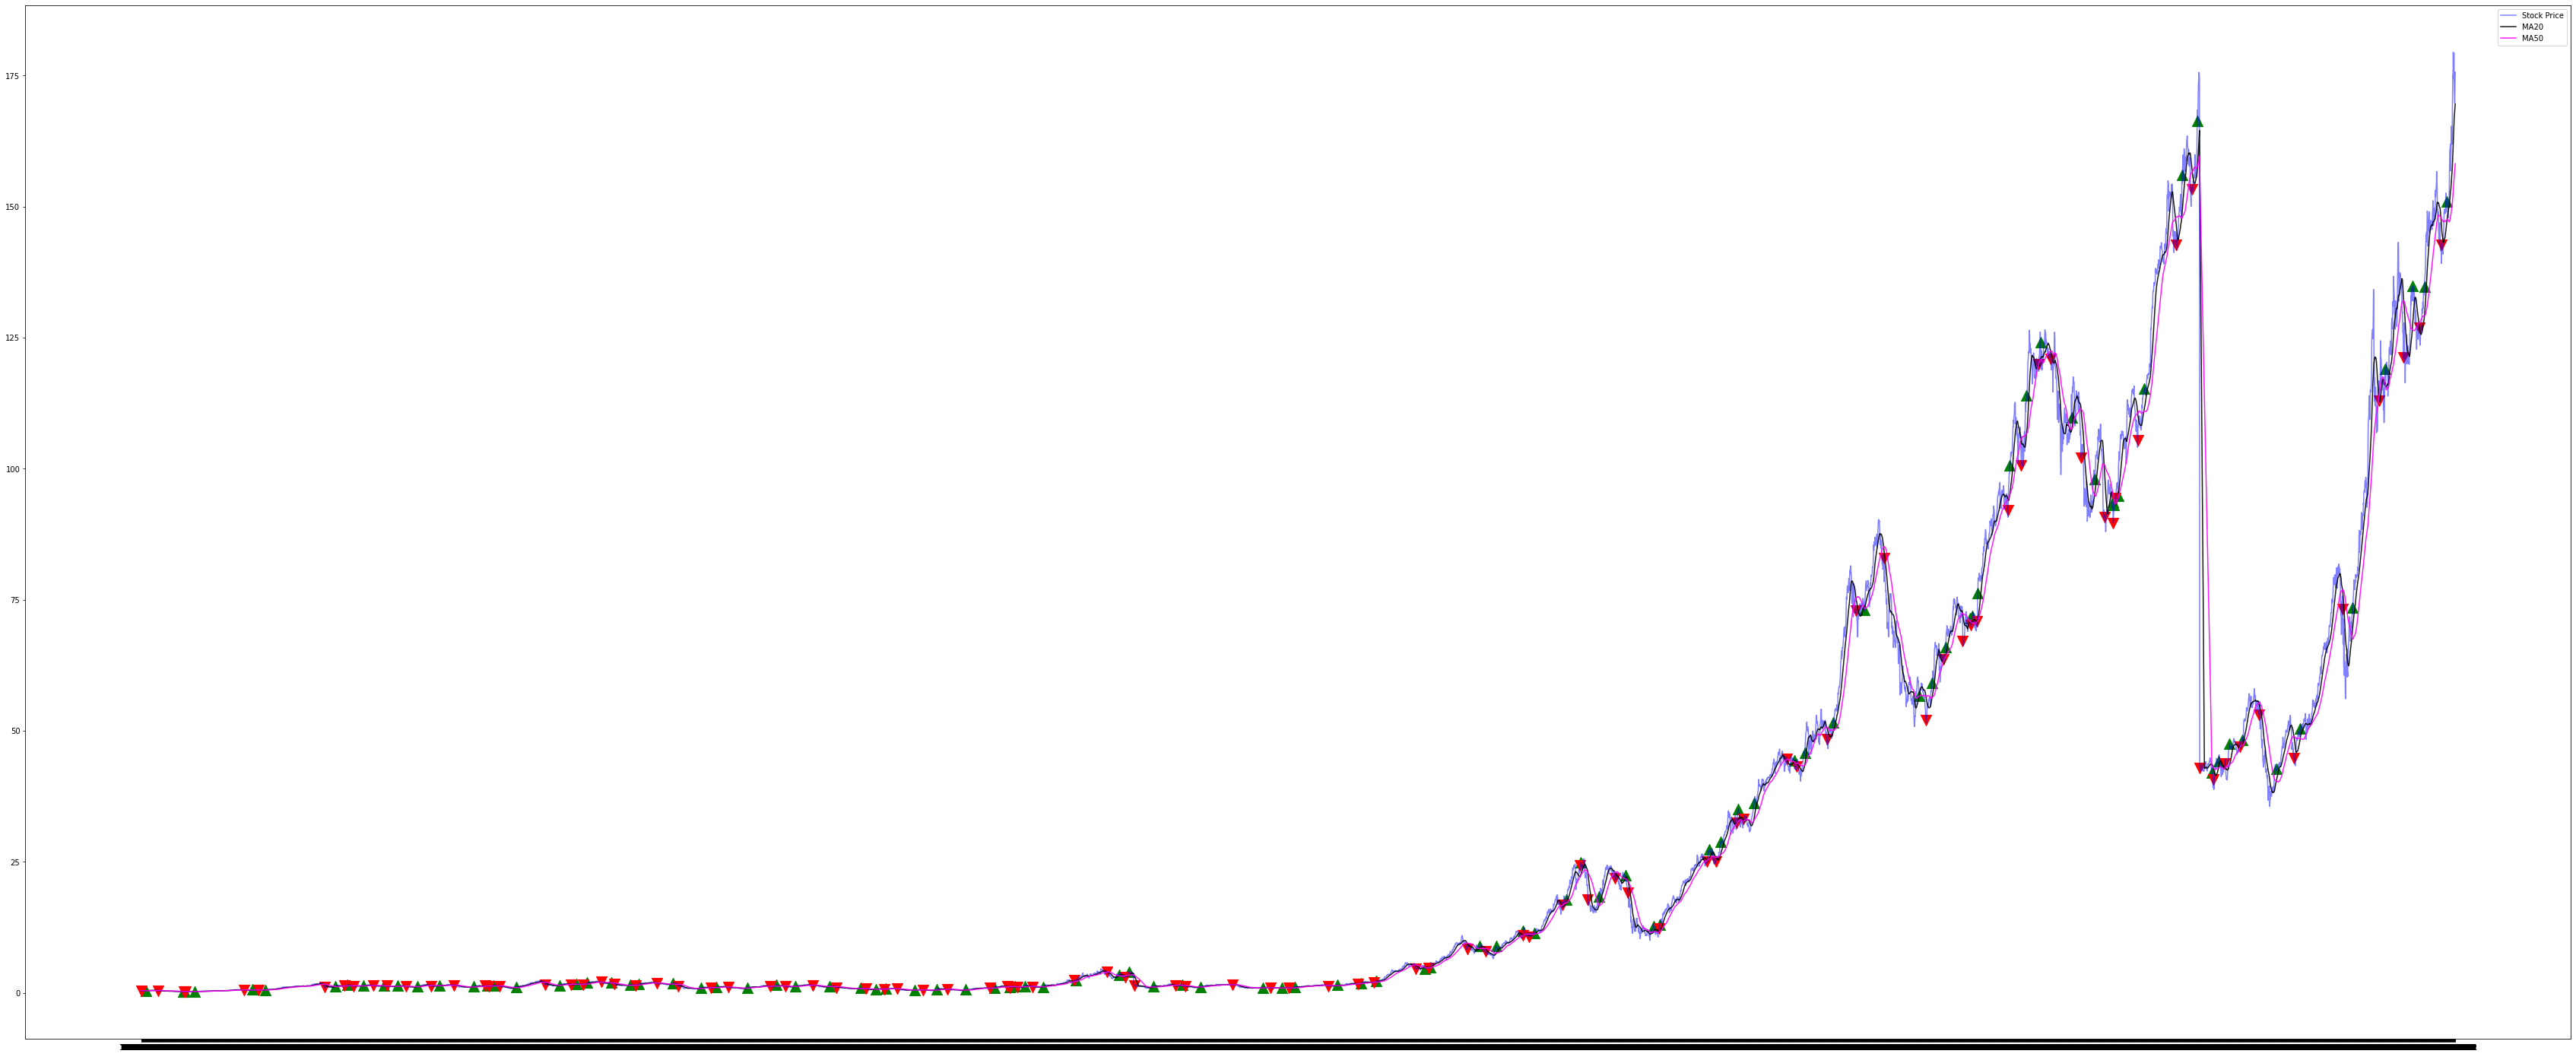

In [9]:
plt.figure(figsize=(60,25))
plt.plot(df["Close"], label = "Stock Price", c = "blue", alpha = 0.5)
plt.plot(df["MA20"], label = "MA20", c = "k", alpha = 0.9)
plt.plot(df["MA50"], label = "MA50", c = "magenta", alpha = 0.9)

# x-axis is the date when buying signal triggered; y is the stock price
plt.scatter(df.iloc[Buy].index, df.iloc[Buy]["Close"], marker = "^", color = "g", s = 200)
plt.scatter(df.iloc[Sell].index, df.iloc[Sell]["Close"], marker = "v", color = "r", s = 200)
plt.legend()
plt.show()

# smoother lines if longer time period for MA